In [1]:
import numpy as np
import matplotlib.pyplot as pp
from src_dir import *

# A
dim=200
FD_StencilMat=np.zeros((dim,dim))
b = np.ones(dim-1)
c = -2*np.ones(dim)
np.fill_diagonal(FD_StencilMat[1:], b)
np.fill_diagonal(FD_StencilMat[:,1:], b)
np.fill_diagonal(FD_StencilMat, c)
A=FD_StencilMat
A=np.asmatrix(A)

In [2]:
WeightData=np.loadtxt("./Weights_Point.txt")
Endlen=int(len(WeightData)/200-1)

In [3]:
wStart,vStart=np.linalg.eig(A)

Text(0.5, 1.0, 'Eigenvalues of A')

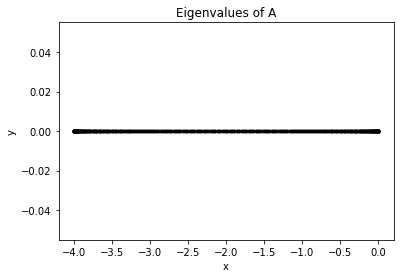

In [4]:
pp.plot(wStart.real,wStart.imag,'.k')
pp.xlabel('x')
pp.ylabel('y')
pp.title('Eigenvalues of A')

(-9.0, 1.0)

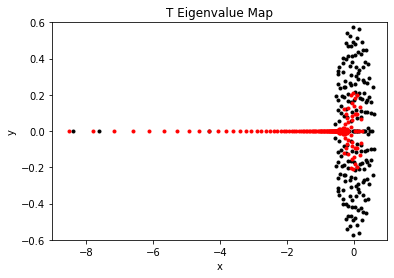

In [5]:
EarlyWeights=WeightData[800:1000,:]
FinalWeights=WeightData[110*200:111*200,:]

wEarly,vEarly=np.linalg.eig(EarlyWeights)
wFinal,vFinal=np.linalg.eig(FinalWeights)

pp.plot(wEarly.real,wEarly.imag,'.k',wFinal.real,wFinal.imag,'.r')
pp.title("T Eigenvalue Map")
pp.xlabel('x')
pp.ylabel('y')
pp.ylim(-0.6,0.6)
pp.xlim(-9,1)

(-1.5, 1.5)

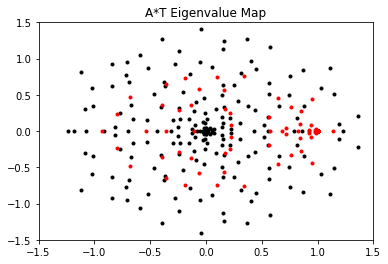

In [6]:
ResultEarly=np.dot(A,EarlyWeights)
ResultFinal=np.dot(A,FinalWeights)

wEarly,vEarly=np.linalg.eig(ResultEarly)
wFinal,vFinal=np.linalg.eig(ResultFinal)

pp.plot(wEarly.real,wEarly.imag,'.k',wFinal.real,wFinal.imag,'.r')
pp.title("A*T Eigenvalue Map")
pp.ylim(-1.5,1.5)
pp.xlim(-1.5,1.5)

In [7]:
# Write T Eigenvalues plots to file
for n in range (2,Endlen):
    EarlyWeights=WeightData[int((n-1)*200-1):int(n*200-1),:]
    wEarly,vEarly=np.linalg.eig(EarlyWeights)
    pp.plot(wEarly.real,wEarly.imag,'.k')
    pp.title(" T Eigenvalue Map")
#     pp.ylim(-1.25,1.25)
#     pp.xlim(-1.25,1.25)
    pp.ylim(-1,1)
    pp.xlim(-2.5,1)
    fname='./T_SpectrumPlots/Error'+str(n)+'.png'
    pp.savefig(fname)
    pp.close()

In [9]:
# Write A*T Eigenvalues plots to file

EarlyWeights0=WeightData[int((2-1)*200-1):int(2*200-1),:]
ResultEarly0=np.dot(A,EarlyWeights0)
wEarly0,vEarly0=np.linalg.eig(ResultEarly0)


for n in range (2,Endlen):

    EarlyWeights=WeightData[int((n-1)*200-1):int(n*200-1),:]
    ResultEarly=np.dot(A,EarlyWeights)
    wEarly,vEarly=np.linalg.eig(ResultEarly)
    pp.plot(wEarly.real,wEarly.imag,'.r',label='Learned')
    pp.plot(wEarly0.real,wEarly0.imag,'.k',label='Initial')
    # pp.legend(loc='best')
    pp.legend(loc='upper right')

    t=np.linspace(0,2*np.pi,1000)
    pp.plot(np.cos(t), np.sin(t), linewidth=1)

    pp.title(" $A*T$ Eigenvalues in Complex Plane")
    pp.ylim(-1.5,1.5)
    pp.xlim(-1.5,1.5)
    fname='./AT_SpectrumPlots/Error'+str(n)+'.png'

    pp.savefig(fname,dpi = 500)
    pp.close()

In [16]:
# Make gif of T eigenvalues
from PIL import Image
import glob
import os

frames = []
imgs = sorted(glob.glob("./T_SpectrumPlots/*.png"), key=os.path.getmtime)
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
frames[0].save('TSpectrum.gif', format='GIF',append_images=frames[1:],save_all=True,duration=360, loop=0)

In [10]:
# Make gif of A*T eigenvalues

from PIL import Image
import glob
import os

frames = []
imgs = sorted(glob.glob("./AT_SpectrumPlots/*.png"), key=os.path.getmtime)
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
frames[0].save('ATSpectrum.gif', format='GIF',append_images=frames[1:],save_all=True,duration=360, loop=0)

In [27]:
for m in range (1,Endlen):
    W=WeightData[-201:-1,:]
    x=np.linspace(-5,5,200)
    sigma=0.2*5
    loc=np.random.uniform(-5,5)
    b=Gauss_pdf(x,loc,sigma)
    b_norm=np.linalg.norm(b)
    b=b/b_norm

    x0=np.dot(W,b)
    x0_norm=np.linalg.norm(x0)
    x0=x0/x0_norm
    wTest,vTest=np.linalg.eig(A)
    DotProdx0=np.dot(vTest.T,x0)

    pp.subplot(2, 1, 1)
    pp.plot(x,b)
    pp.xlabel("x")
    pp.ylabel("b")
    pp.title("RHS of Poisson Problem")

    pp.subplot(2, 1, 2)
    pp.plot(DotProdx0.T,'.')
    pp.xlabel("Eigenvalue index")
    pp.ylabel("$<v_i,T*b_i>$")
    pp.title("Inner product between $T*b_i$ and Eigenvectors of $A$")
    pp.ylim(-1.25,1.25)

    pp.subplots_adjust(hspace = 0.75)
    fname='./TRHS/'+str(m)+'.svg'
    pp.savefig(fname)
    pp.close()




In [36]:
for m in range (1,Endlen):
    W=WeightData[-201:-1,:]
    x=np.linspace(-5,5,200)
    sigma=0.2
    loc=np.random.uniform(-5,5)
    b=Gauss_pdf(x,loc,sigma)
    b_norm=np.linalg.norm(b)
    b=b/b_norm

    x0=np.dot(W,b)
    residual=b-np.dot(A,x0)
    residual_norm=np.linalg.norm(residual)
    residual=residual.T/residual_norm
    
    wTest,vTest=np.linalg.eig(A)
    DotProd=np.dot(vTest.T,residual)

    pp.subplot(2, 1, 1)
    pp.plot(x,b)
    pp.xlabel("x")
    pp.ylabel("b")
    pp.title("RHS of Poisson Problem")

    pp.subplot(2, 1, 2)
    pp.plot(residual,'.')
    pp.xlabel("x")
    pp.ylabel("r_0")
    pp.title("Residual")
    pp.ylim(-1.25,1.25)

    pp.subplots_adjust(hspace = 0.75)
    fname='./Resid/'+str(m)+'.svg'
    pp.savefig(fname)
    pp.close()

